Сборный проект № 1

Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


    Цель исследования:
    
    1. Определить рыночную стоимость объектов недвижимости
    2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
    3. Установить, какие факторы влияют на ценообразование стоимости квартир.
    
    Ход исследования:

    Данные для проведения анализа я получу из файла '/datasets/real_estate_data.csv'. О качестве данных пока ничего не известно. Поэтому перед началом исследования проведем обзор данных. На этапе предобработки данных проведу поиск явных и неявных дубликатов, проверю наличие пропущенных значений, а также проверю данные на наличие ошибок и их влияние на исследование. Далее поищу возможность исправить ошибки, которые не приведут к искажению конечного результата.
    Далее добавим несколько столбцов, необходимых для проведения исследовательского анализа.
    Таким образом, процесс исследования данных пройдет в несколько этапов:
    - обзор данных,
    - предобработка данных,
    - расчеты и добавление результатов в таблицу,
    - исследование показателей, влияющих на стоимость объектов недвижимости,
    - анализ средней цены за 1 квадратный метр квартиры в Санкт-Петербурге и Ленинградской области,
    - анализ средней стоимости квартир в Санкт-Петербурге в зависимости от расстояния до центра города,
    - общий вывод.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import stats as st

Шаг 1. Откройте файл с данными и изучите общую информацию


In [3]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

Для начала посмотрим первые строки датафрейма и общую информацию о нем, чтобы выявить наличие пропущенных значений, посмотреть наименования столбцов и определить тип данных, которые будем исследовать.

In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наш датафрейм состоит из 16715 строк, в нескольких столбцах таблицы есть пропущенные значения и некорректный тип данных. Далее разберемся, какие пропуски нужно заполнить, а какие  лучше не трогать. Наименования некоторых столбцов не соответствуют змеиному регистру, для удобства изменим им наименования. 

Шаг 2. Подготовьте данные
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


In [6]:
# приведем наименования столбцов к нижнему регистру
games.columns = map(str.lower, games.columns)
# проверяем
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# проверим датафрейм на наличие явных дубликатов
games.duplicated().sum()

0

In [8]:
# посчитаем количество пропусков
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# удалим пропущенные значения в столбцах 'year_of_release' и 'name'. Так как доля этих значений невелика, они не повлияют на результаты исследования
games = games.dropna(subset=['year_of_release', 'name']).reset_index(drop=True)

In [10]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [11]:
#преобразуем данные в столбце 'year_of_release' к типу int
games['year_of_release'] = games['year_of_release'].astype('int64')

# проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [12]:
# так как преобразовать значения в столбце 'user_score' к типу float не получилось, посмотрим его уникальные значения
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
games['user_score'] = games['user_score'].fillna(value = 0)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

Аббревиатура TBD расшифровывается To Be Determined, то есть "будет определено", то есть оценка пользователей отсутствует. Заменим эти значения на 0. Так как значения столбца с оценкой пользователей будем применять для проверки гипотез и доля пропущенных значений велика, то будем принимать во внимание срезы данных со значениями больше 0.


In [14]:
#
games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
#
games['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
games['critic_score'] = games['critic_score'].fillna(value = 0)

In [16]:
games['rating'] = games['rating'].fillna(value='unknown')

In [17]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [18]:
#преобразуем данные в столбце 'user_score' к типу float
games['user_score'] = games['user_score'].astype('float64')

# проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
# проверим столбец 'name' на наличие неявных дубликатов
games.loc[games.duplicated(subset=['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


В результате мы видим, что игра Madden NFL 13 на платформе PS3 год релиза 2012 присутствует в датасете дважды. Чтобы не потерять данные о продажах, суммируем их.

In [20]:
games.loc[600,'eu_sales'] = games.loc[600,'eu_sales'] + games.loc[15969,'eu_sales']


In [21]:
games = games.drop(index=15969)

In [22]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,33.491395,3.234100,0.536056
std,5.875546,0.818400,0.506731,0.311109,0.188011,35.820566,3.689113,1.558829
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

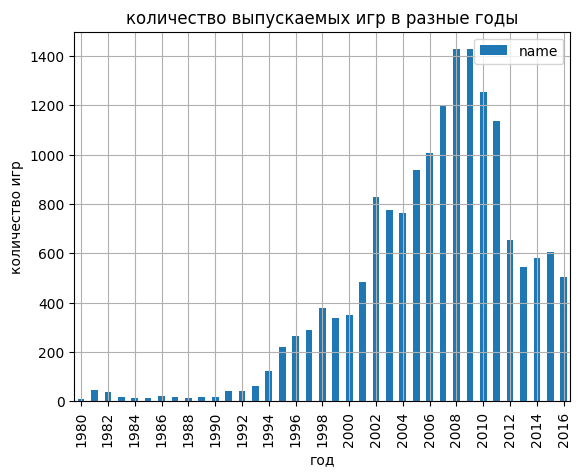

In [48]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']

pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count').plot.bar()
plt.locator_params (axis='x', nbins= 30)
plt.title('количество выпускаемых игр в разные годы')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.grid(True)
plt.show()

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [34]:
df_platforms = pd.pivot_table(games, index='platform', values='sales', aggfunc=sum).sort_values(by='sales', ascending=False).reset_index()

top_platforms = df_platforms['platform'].head(6)
top_platforms.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

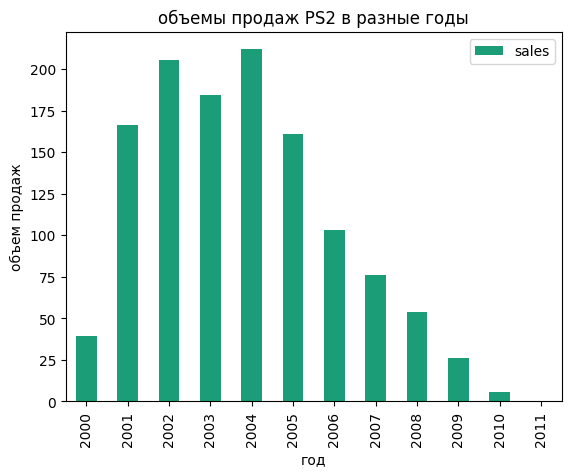

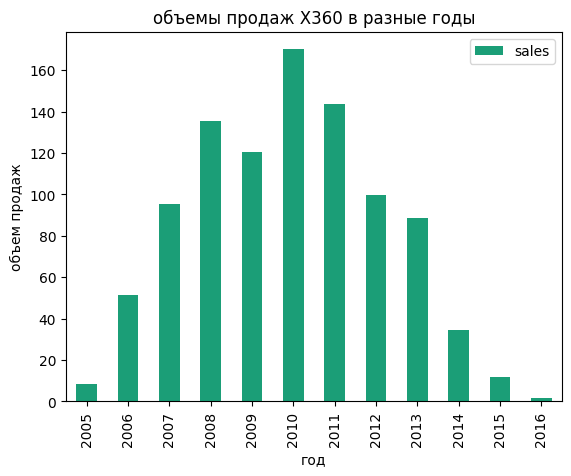

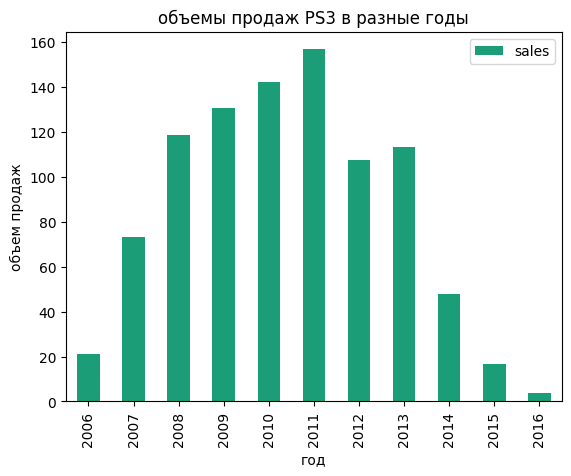

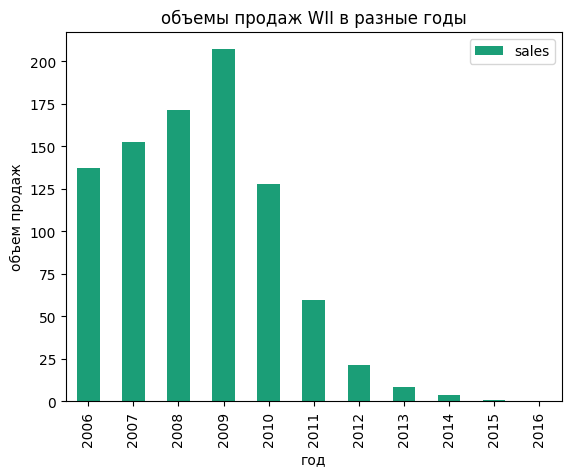

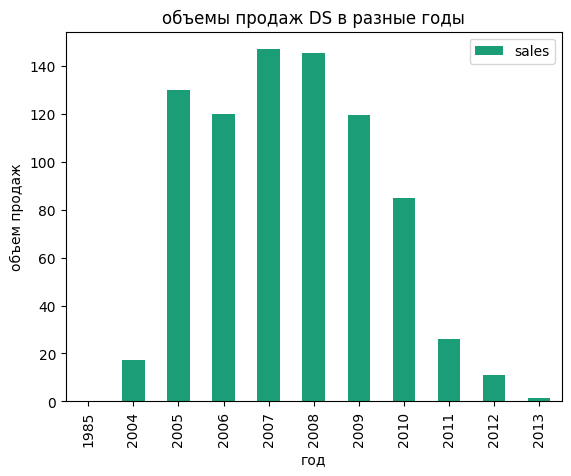

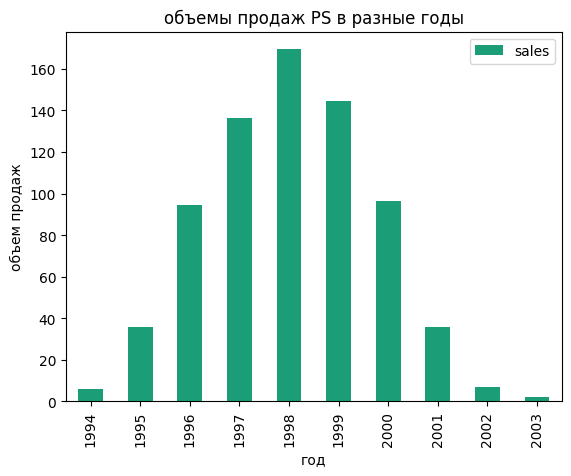

In [51]:
for platform in top_platforms:
    games.loc[games['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc=sum).plot.bar(color=colors)
    plt.locator_params (axis='x', nbins= 30)
    plt.title(f'объемы продаж {platform.upper()} в разные годы')
    plt.xlabel('год')
    plt.ylabel('объем продаж')
plt.show()

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [64]:
games_2012 = games.query('year_of_release >= 2012')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [69]:
df_platforms_2012 = pd.pivot_table(games_2012, index='platform', columns='year_of_release', values='sales', aggfunc=sum).sort_values(by='platform', ascending=False)
df_platforms_2012
#

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
XOne,NaN,18.96,54.07,60.14,26.15
X360,99.74,88.58,34.74,11.96,1.52
WiiU,17.56,21.65,22.03,16.35,4.60
Wii,21.71,8.59,3.75,1.14,0.18
PSV,16.19,10.59,11.90,6.25,4.25
PSP,7.69,3.14,0.24,0.12,NaN
PS4,NaN,25.99,100.00,118.90,69.25
PS3,107.36,113.25,47.76,16.82,3.60
PC,23.22,12.38,13.28,8.52,5.25


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

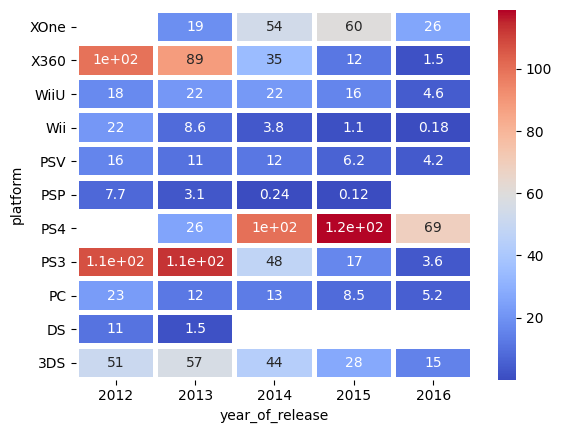

In [70]:
seaborn.heatmap(df_platforms_2012, annot=True, cmap="coolwarm", linewidths=3)



Потенциально прибыльными платформами будут: 3DS, XONE, PS4, WIIU, PC.

Большинство платформ к 2016 году либо перестали выпускать игры, либо тенденция по выпуску игр пошла на спад.

Выше перечисленные плтаформы в соответствие с графиком появились недавно, а их тенденция к выпуску игр имеет положительную динамику. PC же хоть и имеет неоднозначную динамику, но не строго отрицательную и имеет значительный объем ежегодно выпускаемых игр. Считаю, что эта платформа будет оставаться актуальной долгое время.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [75]:
top_platforms_2012 = ['3DS', 'XONE', 'PS4', 'WIIU', 'PC']
